In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data=pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\crop_yield_data.csv")
data.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


In [3]:
print("Shape is",data.shape)

Shape is (3000, 6)


In [4]:
print("Checking Missing Value")
data.isna().sum()

Checking Missing Value


rainfall_mm           0
soil_quality_index    0
farm_size_hectares    0
sunlight_hours        0
fertilizer_kg         0
crop_yield            0
dtype: int64

In [5]:
print("Descriptive Statistics")
data.describe().T

Descriptive Statistics


,count,mean,std,min,25%,50%,75%,max
rainfall_mm,3000.0,1263.095000,432.371756,500.0,896.00,1277.0,1636.0,2000.0
soil_quality_index,3000.0,5.506667,2.855172,1.0,3.00,6.0,8.0,10.0
farm_size_hectares,3000.0,498.801000,287.122742,10.0,242.00,505.0,741.0,1000.0
sunlight_hours,3000.0,7.995333,2.621501,4.0,6.00,8.0,10.0,12.0
fertilizer_kg,3000.0,1549.450333,814.326919,100.0,869.75,1542.0,2225.0,3000.0
crop_yield,3000.0,328.099000,145.036503,46.0,199.00,332.0,455.0,628.0


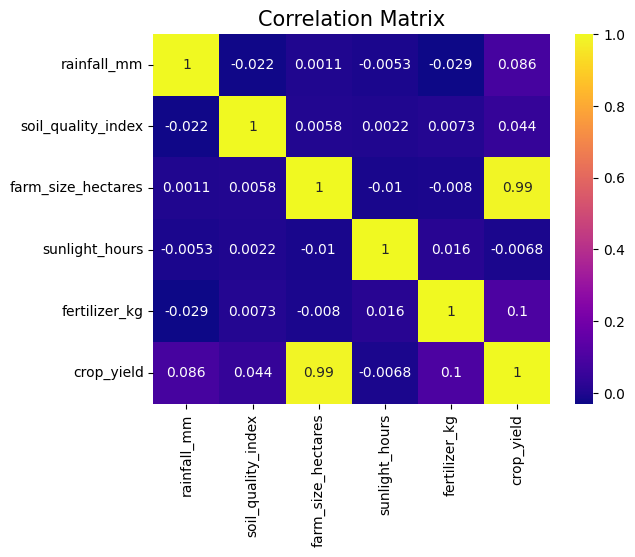

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.corr(),annot=True,cmap="plasma")
plt.title("Correlation Matrix",fontsize=15)
plt.show()

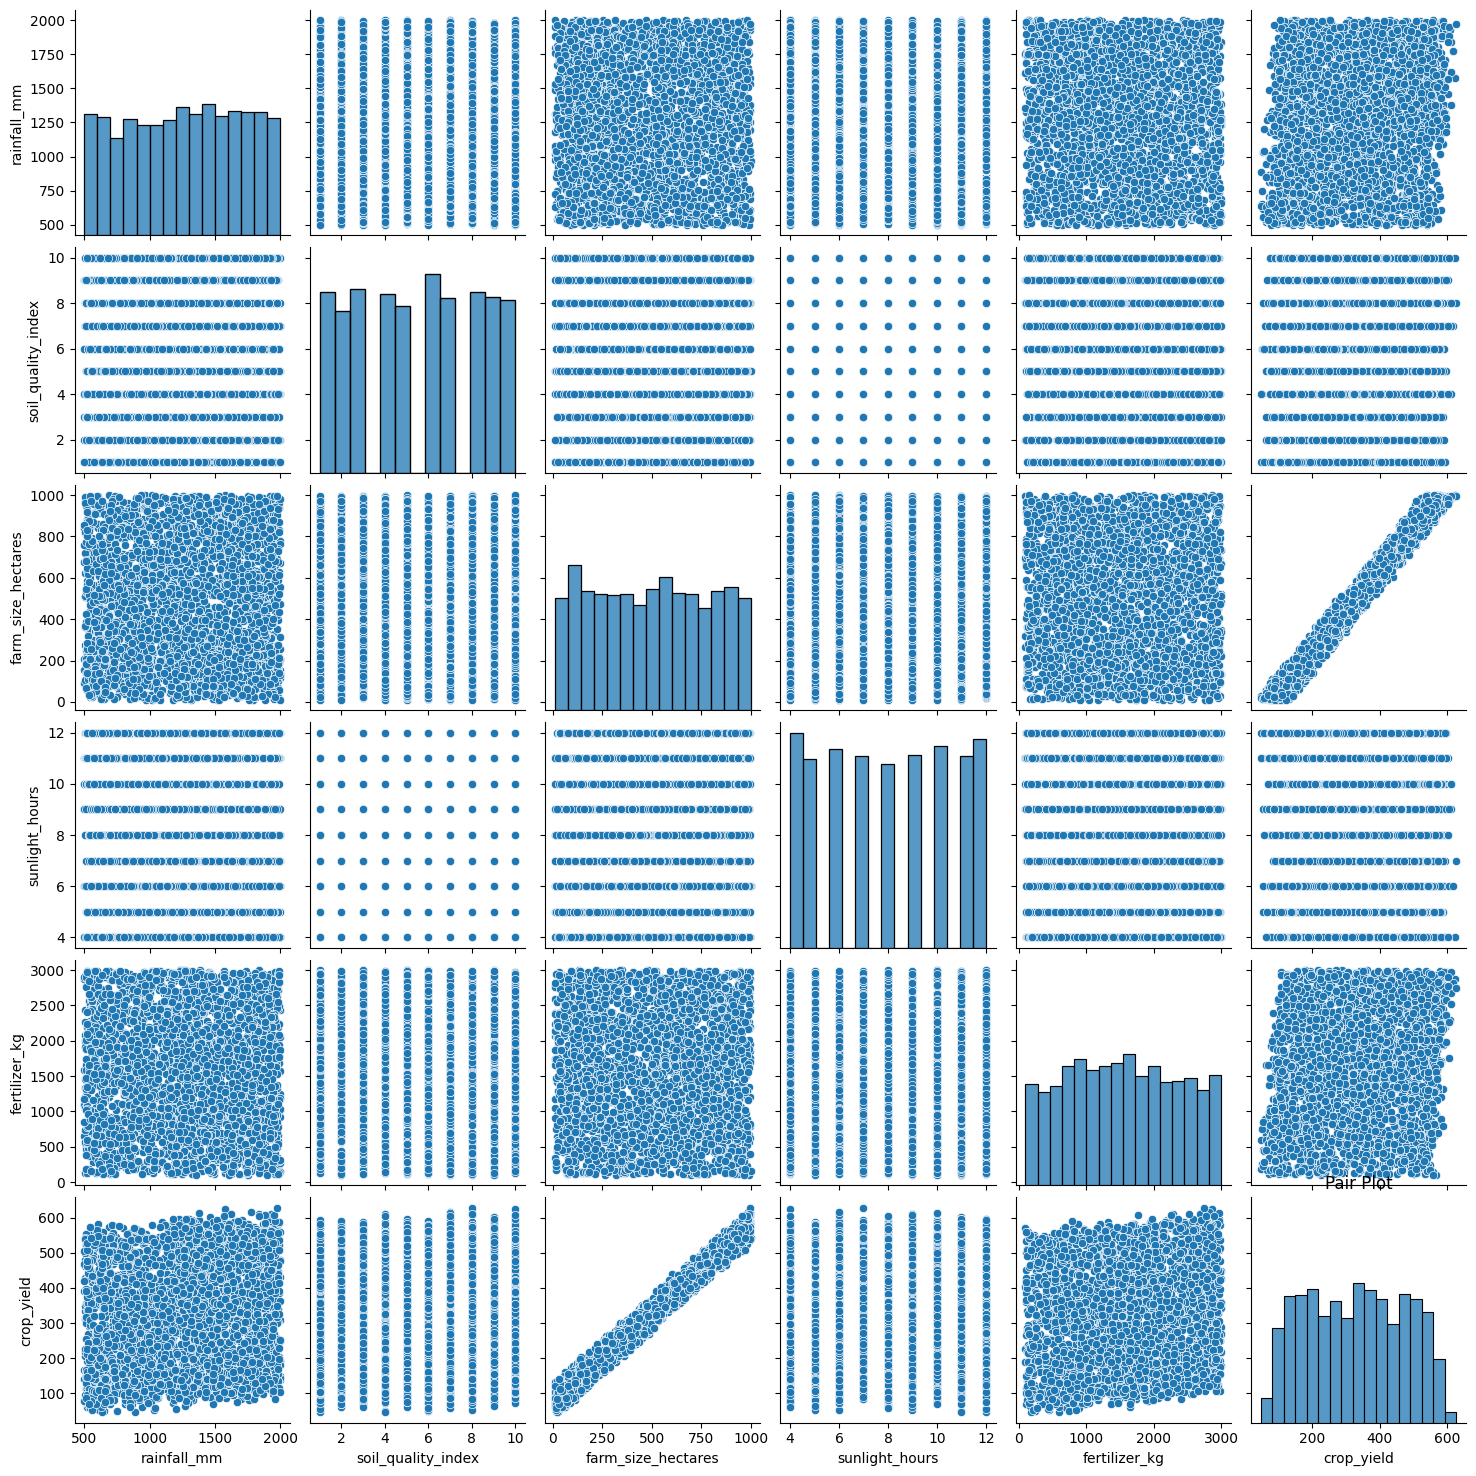

In [7]:
sns.pairplot(data)
plt.title("Pair Plot")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

x=data.drop(columns="crop_yield")
y=data["crop_yield"]

x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2=r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R Squared of Linear Regression is",r2)
print("Mean Squared Error of Linear Regression is",mse)

R Squared of Linear Regression is 0.9999958319683124
Mean Squared Error of Linear Regression is 0.0867452177974168


In [11]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(data)
data["Cluster"]=kmeans.labels_
data.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield,Cluster
0,1626,9,636,11,1006,404,2
1,1959,9,73,11,112,115,2
2,1360,1,352,5,702,231,2
3,1794,2,948,7,299,537,2
4,1630,5,884,5,2733,554,1


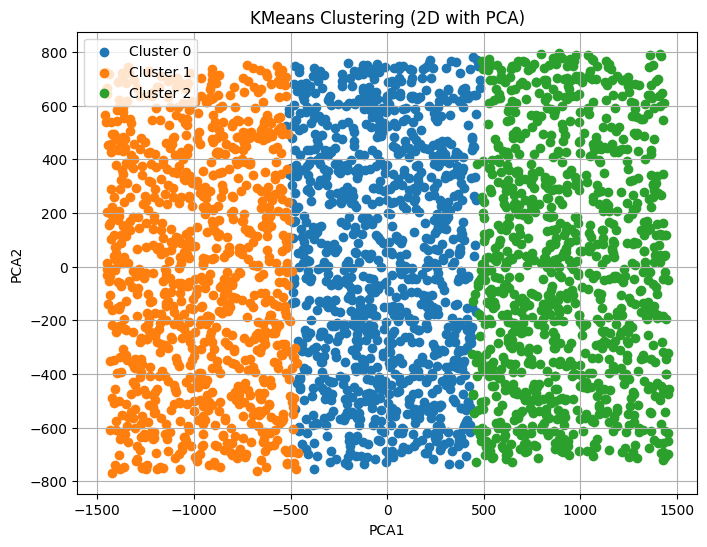

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data.drop("Cluster", axis=1))

pca_df = pd.DataFrame(pca_components, columns=["PCA1", "PCA2"])

pca_df["Cluster"] = data["Cluster"]

# Plot the clusters in 2D based on PCA components
plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"], label=f"Cluster {cluster}")

plt.title("KMeans Clustering (2D with PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid()
plt.show()


In [13]:
cluster_0 = data[data["Cluster"] == 0]
print("Cluster 1")
cluster_0.head()

Cluster 1


,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield,Cluster
5,1595,4,928,7,1891,556,0
7,621,9,167,12,1911,158,0
10,830,7,667,11,1253,397,0
13,1896,8,234,5,1136,211,0
16,630,9,624,4,1087,369,0


In [14]:
cluster_1=data[data["Cluster"]==1]
print("Cluster 2")
cluster_1.head()

Cluster 2


,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield,Cluster
4,1630,5,884,5,2733,554,1
11,1982,1,864,5,2190,536,1
15,1371,10,322,7,2770,276,1
18,1269,6,868,9,2682,537,1
19,843,1,822,12,2449,486,1


In [15]:
cluster_2=data[data["Cluster"]==2]
print("Cluster 3")
cluster_2.head()

Cluster 3


,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield,Cluster
0,1626,9,636,11,1006,404,2
1,1959,9,73,11,112,115,2
2,1360,1,352,5,702,231,2
3,1794,2,948,7,299,537,2
6,1544,10,361,10,547,257,2
